In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# step 1 随机生成6*4的整数矩阵X
np.random.seed(1234)
X = np.random.randint(0,10,size=(6,4))

# step 2  计算X相关系数矩阵R
R = np.corrcoef(X.T)

# step 3 计算特征值Lambda和特征向量e
Lambda, e = np.linalg.eig(R)

# step 4 计算主成分贡献率及累计贡献率
k = 3
eigen_pairs = [(Lambda[i], e[:, i]) for i in range(len(Lambda))]
eigen_pairs = sorted(eigen_pairs, reverse=True, key=lambda k: k[0])         
# 将特征值从大到小排列，reverse倒序，k[0]表示按第一个元素的大小进行排序，也可以写成x：x[0],可以任意更改
get_we = lambda x: x / x.sum()
weights = get_we(np.stack(eigen_pairs[i][0] for i in range(len(Lambda))))   # 主成分贡献率
acc_we = weights[:k].sum()                                                  # 累计贡献率

E = np.column_stack((eigen_pairs[i][1] for i in range(k)))                  # 提取前k个特征值对应的特征向量

# step 4 主成分模型
X_pca = X.dot(E)

from sklearn.decomposition import PCA

pca = PCA(n_components=k)
X_spca = pca.fit_transform(X)

In [14]:
R

array([[ 1.        ,  0.60302269, -0.01277753, -0.06097108],
       [ 0.60302269,  1.        , -0.6164113 ,  0.20221818],
       [-0.01277753, -0.6164113 ,  1.        , -0.4635406 ],
       [-0.06097108,  0.20221818, -0.4635406 ,  1.        ]])

In [12]:
X_pca

array([[ -3.58699777,  -3.11139424,   5.44104884],
       [-10.71211749,  -4.11498808,   7.05947587],
       [ -2.63524376, -10.61302629,   6.59206947],
       [  1.047068  ,  -3.22371917,  11.00445777],
       [  1.35707468,  -2.03004602,   4.82253091],
       [ -0.17402489,  -7.4228481 ,   5.44793711]])

In [13]:
X_spca

array([[ 1.31546152,  1.78167439, -1.5083971 ],
       [ 8.05126286,  1.80953205,  0.56331837],
       [ 0.73901439, -5.48577118,  0.54064894],
       [-3.89863825,  2.02420759,  3.87090015],
       [-4.14422655,  2.51492834, -2.39729214],
       [-2.06287384, -2.64457154, -1.06917918]], dtype=float32)

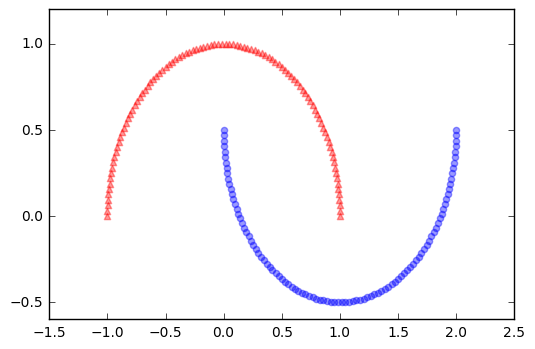

In [130]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='r', marker='^', alpha=.4)
plt.scatter(X[y==1, 0], X[y==1, 1], color='b', marker='o', alpha=.4)
plt.show()

In [131]:
from scipy.spatial.distance import pdist, squareform

def rbf_kpca(X, gamma, k):
    sq_dist = pdist(X, metric='sqeuclidean')
                            # N = X.shape[0]    
                            # sq_dist.shape = N*(N-1)/2
    mat_sq_dist = squareform(sq_dist)
                            # mat_sq_dist.shape = (N, N)
    # step 1
    K = np.exp(-gamma*mat_sq_dist)

    # step 2
    N = X.shape[0]
    one_N = np.ones((N, N))/N
    K = K - one_N.dot(K) - K.dot(one_N) + one_N.dot(K).dot(one_N)

    # step 3
    Lambda, Q = np.linalg.eig(K)
    eigen_pairs = [(Lambda[i], Q[:, i]) for i in range(len(Lambda))]
    eigen_pairs = sorted(eigen_pairs, reverse=True, key=lambda k: k[0])
    return np.column_stack((eigen_pairs[i][1] for i in range(k)))

In [132]:
X_kpca = rbf_kpca(X, gamma=15, k=2)

In [133]:
X_kpca

array([[-0.09702510+0.j,  0.00166689+0.j],
       [ 0.07551587+0.j, -0.09360162+0.j],
       [-0.09001402+0.j, -0.06545319+0.j],
       [ 0.09698242+0.j, -0.00402203+0.j],
       [-0.05902871+0.j, -0.09376774+0.j],
       [ 0.02010562+0.j, -0.04340973+0.j],
       [ 0.06345662+0.j,  0.09595779+0.j],
       [-0.09665255+0.j,  0.01865273+0.j],
       [ 0.09104938+0.j,  0.06430850+0.j],
       [ 0.09436499+0.j,  0.04550568+0.j],
       [-0.05665112+0.j,  0.09178683+0.j],
       [ 0.04938905+0.j,  0.08473733+0.j],
       [ 0.05665112+0.j,  0.09178683+0.j],
       [ 0.03908811+0.j,  0.07123097+0.j],
       [ 0.03112105+0.j, -0.06176106+0.j],
       [-0.08220076+0.j, -0.08577760+0.j],
       [-0.02010562+0.j, -0.04340973+0.j],
       [ 0.06561453+0.j,  0.09668424+0.j],
       [ 0.06350528+0.j, -0.09569588+0.j],
       [-0.06129435+0.j, -0.09489433+0.j],
       [ 0.07726876+0.j,  0.09395824+0.j],
       [-0.04172276+0.j,  0.07501557+0.j],
       [ 0.08644848+0.j,  0.07955893+0.j],
       [ 0.

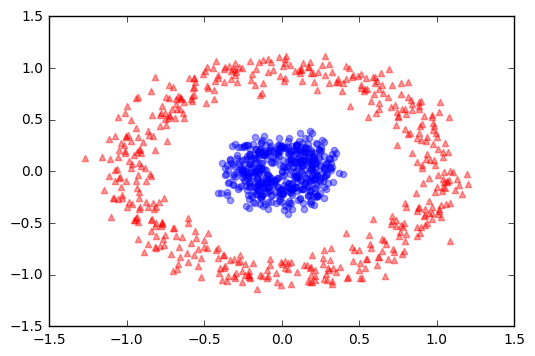

In [134]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise=.1, factor=.2, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='r', marker='^', alpha=.4)
plt.scatter(X[y==1, 0], X[y==1, 1], color='b', marker='o', alpha=.4)
plt.show()

In [135]:
X_kpca = rbf_kpca(X, gamma=15, k=2)

C:\Users\wangxw\Anaconda3\lib\site-packages\numpy\core\numeric.py:533: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


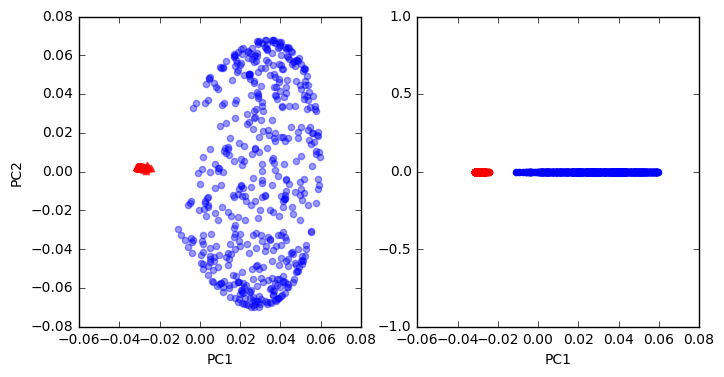

In [136]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='r', marker='^', alpha=.4)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='b', marker='o', alpha=.4)

label_count = np.bincount(y)
                                # 统计各类别出现的次数
                                # label_count[0] = 500
                                # label_count[1] = 500
ax[1].scatter(X_kpca[y==0, 0], np.zeros(label_count[0]), color='r')
ax[1].scatter(X_kpca[y==1, 0], np.zeros(label_count[1]), color='b')
                                # y轴置零
                                # 投影到x轴
ax[1].set_ylim([-1, 1])
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')

plt.show()

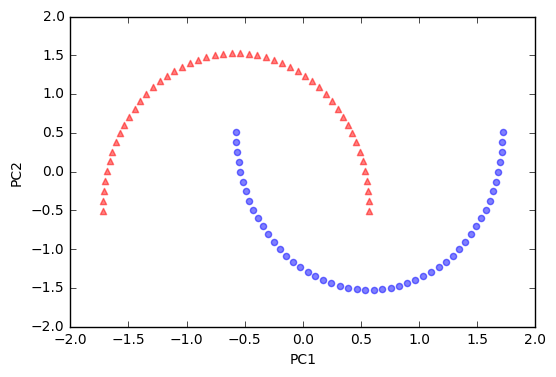

In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

x2, y2 = make_moons(n_samples=100, random_state=123)
sc = StandardScaler()
x2_std = sc.fit_transform(x2)               # 标准正态化

plt.scatter(x2_std[y2==0, 0], x2_std[y2==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(x2_std[y2==1, 0], x2_std[y2==1, 1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

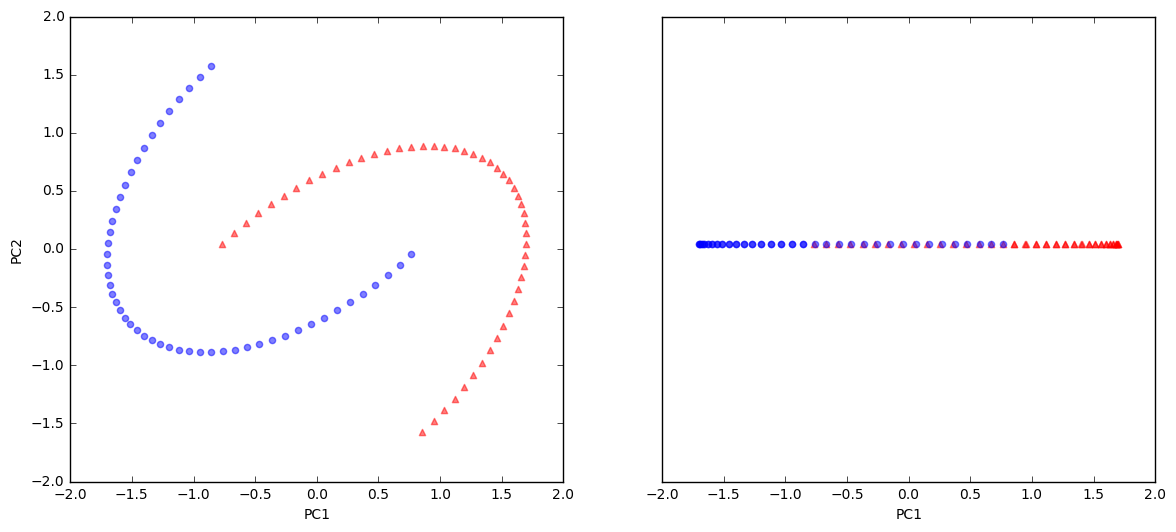

In [138]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_spca = pca.fit_transform(x2_std)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
ax[0].scatter(x_spca[y2==0, 0], x_spca[y2==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(x_spca[y2==1, 0], x_spca[y2==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(x_spca[y2==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(x_spca[y2==1, 0], np.zeros((50,1))+0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

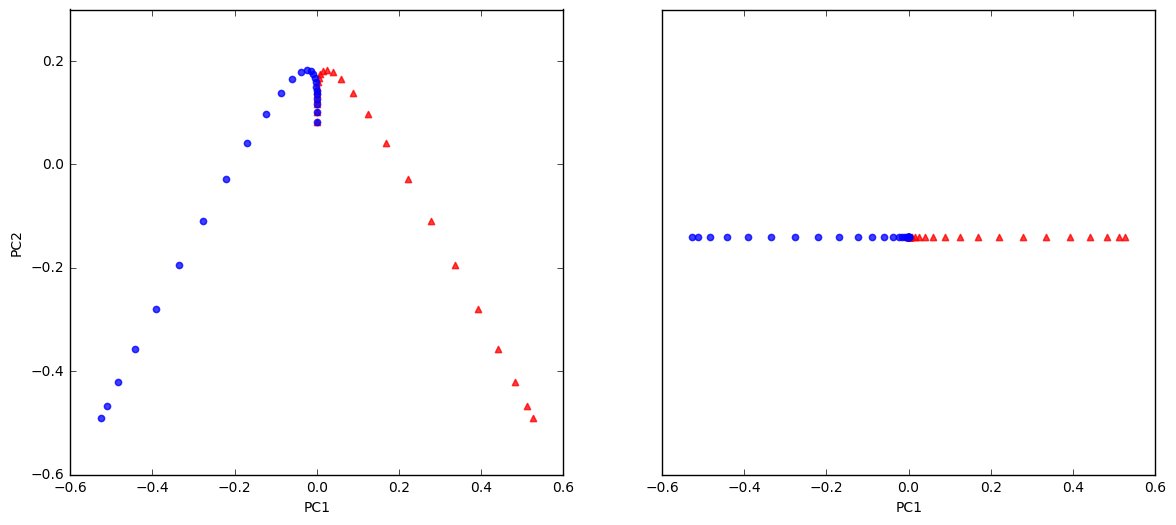

In [139]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
x_kpca = kpca.fit_transform(x2_std)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
ax[0].scatter(x_kpca[y2==0, 0], x_kpca[y2==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(x_kpca[y2==1, 0], x_kpca[y2==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(x_kpca[y2==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(x_kpca[y2==1, 0], np.zeros((50,1))+0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

In [140]:
np.random.seed(1234)
X = np.random.randint(0,10,size=(6,4))

X_pca2 = pca.fit_transform(X)

In [141]:
X

array([[3, 6, 5, 4],
       [8, 9, 1, 7],
       [9, 6, 8, 0],
       [5, 0, 9, 6],
       [2, 0, 5, 2],
       [6, 3, 7, 0]])

In [142]:
X_pca2

array([[ 1.31546152,  1.78167439],
       [ 8.05126286,  1.80953205],
       [ 0.73901439, -5.48577118],
       [-3.89863825,  2.02420759],
       [-4.14422655,  2.51492834],
       [-2.06287384, -2.64457154]], dtype=float32)

In [143]:
X_pca_info = pca.fit(X)

In [144]:
X_pca_info.explained_variance_ratio_

array([ 0.54834628,  0.28524324], dtype=float32)

In [145]:
X_pca_info.components_

array([[ 0.33595985,  0.75774086, -0.47921398,  0.28864104],
       [-0.56093478, -0.25709578, -0.38710797,  0.68512869]], dtype=float32)